<a href="https://colab.research.google.com/github/ObiDaniel/ObiDaniel/blob/main/1st_Telecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Information
A telecom business wants to measure and predict customers' leaving the business. We will use some classification models to predict the churn and use precision,recall, f1-score as KPIs. We will also try to improve the imbalance in the dataset and improve f1-score

Source: Kaggle

#Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import matplotlib.ticker as mtick
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#Import Datasets

In [ ]:
data = pd.read_csv("Telco-Customer-Churn.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
data.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2552,3547-LQRIK,Female,0,Yes,No,47,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,26.90,1250.85,No
1182,3164-YAXFY,Male,0,No,No,57,No,No phone service,DSL,Yes,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,53.75,3196,No
4537,1100-DDVRV,Male,0,Yes,No,17,No,No phone service,DSL,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,49.80,836.35,No
3383,8185-UPYBR,Male,0,Yes,No,6,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.50,438,Yes
7015,0666-UXTJO,Male,1,Yes,No,34,Yes,No,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),85.20,2874.45,No


In [ ]:
#Statistical information
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
# Let's see the data of highest monthly charges

data[data['MonthlyCharges'] == 118.750000]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4586,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No


In [ ]:
#datatypes of the dataset attributes

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data.Churn.value_counts() #Looks like we have an imbalanced dataset

No     5174
Yes    1869
Name: Churn, dtype: int64

#Data Preprocessing

In [ ]:
#Check for null values

data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# check unique values in dataset

data.apply(lambda x: len(x.unique()))

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [ ]:
data.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [ ]:
#The 'TotalCharges'column is a string, Lets convert from string to numbers

In [ ]:
pd.to_numeric(data.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [ ]:
data[pd.to_numeric(data.TotalCharges,errors='coerce').isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
data.iloc[488].TotalCharges

' '

In [ ]:
data.iloc[5218].TotalCharges

' '

In [ ]:
#Remove rows with space in TotalCharges

data_new = data[data.TotalCharges!=' ']
data_new.shape

(7032, 21)

In [ ]:
data_new.TotalCharges = pd.to_numeric(data_new.TotalCharges)

In [ ]:
data_new.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [ ]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


#PERFORM SOME EXPLORATORY DATA ANALYSIS(EDA)

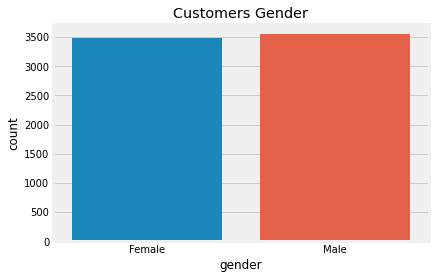

In [ ]:
#Categorical attributes visualization

sns.countplot(data_new['gender'])
plt.title('Customers Gender')
plt.show()

In [ ]:
data_new.gender.value_counts()

Male      3549
Female    3483
Name: gender, dtype: int64

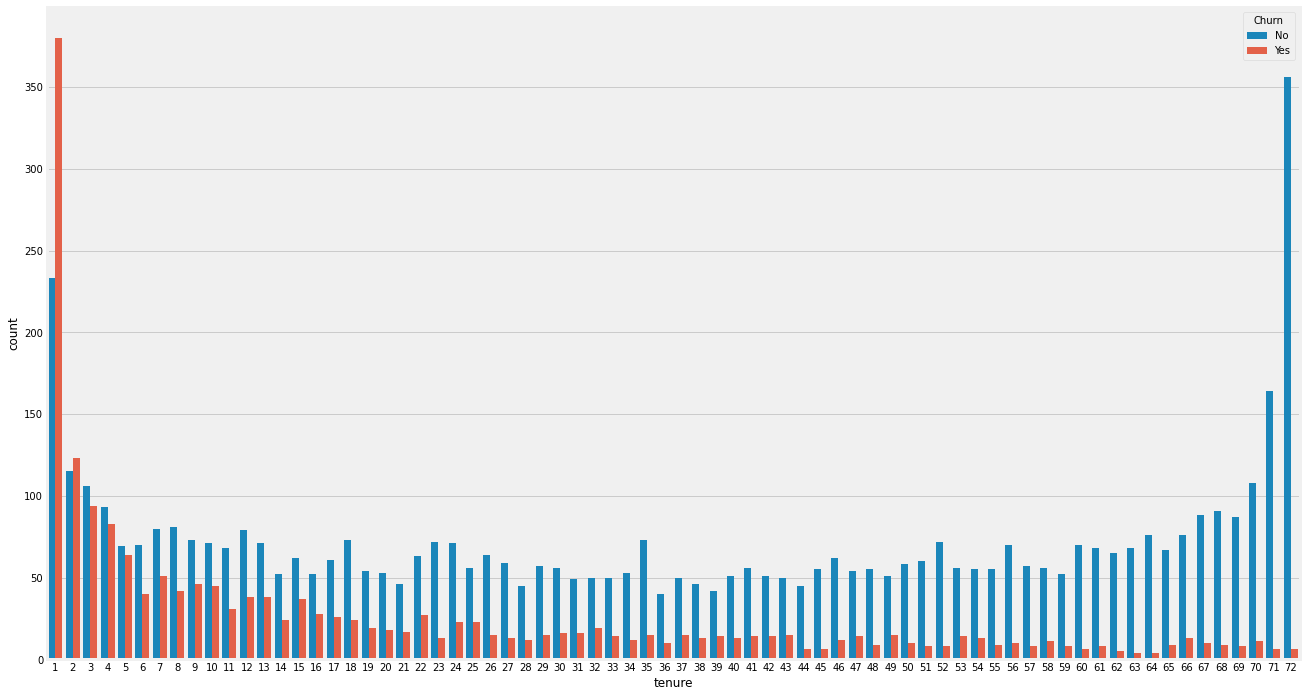

In [ ]:
plt.figure(figsize=[20, 12])
sns.countplot(x = 'tenure', hue = 'Churn', data = data_new) #Most people that churned are still new with the company/
#while those that didnot churn have been with the company for a longer time

In [ ]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


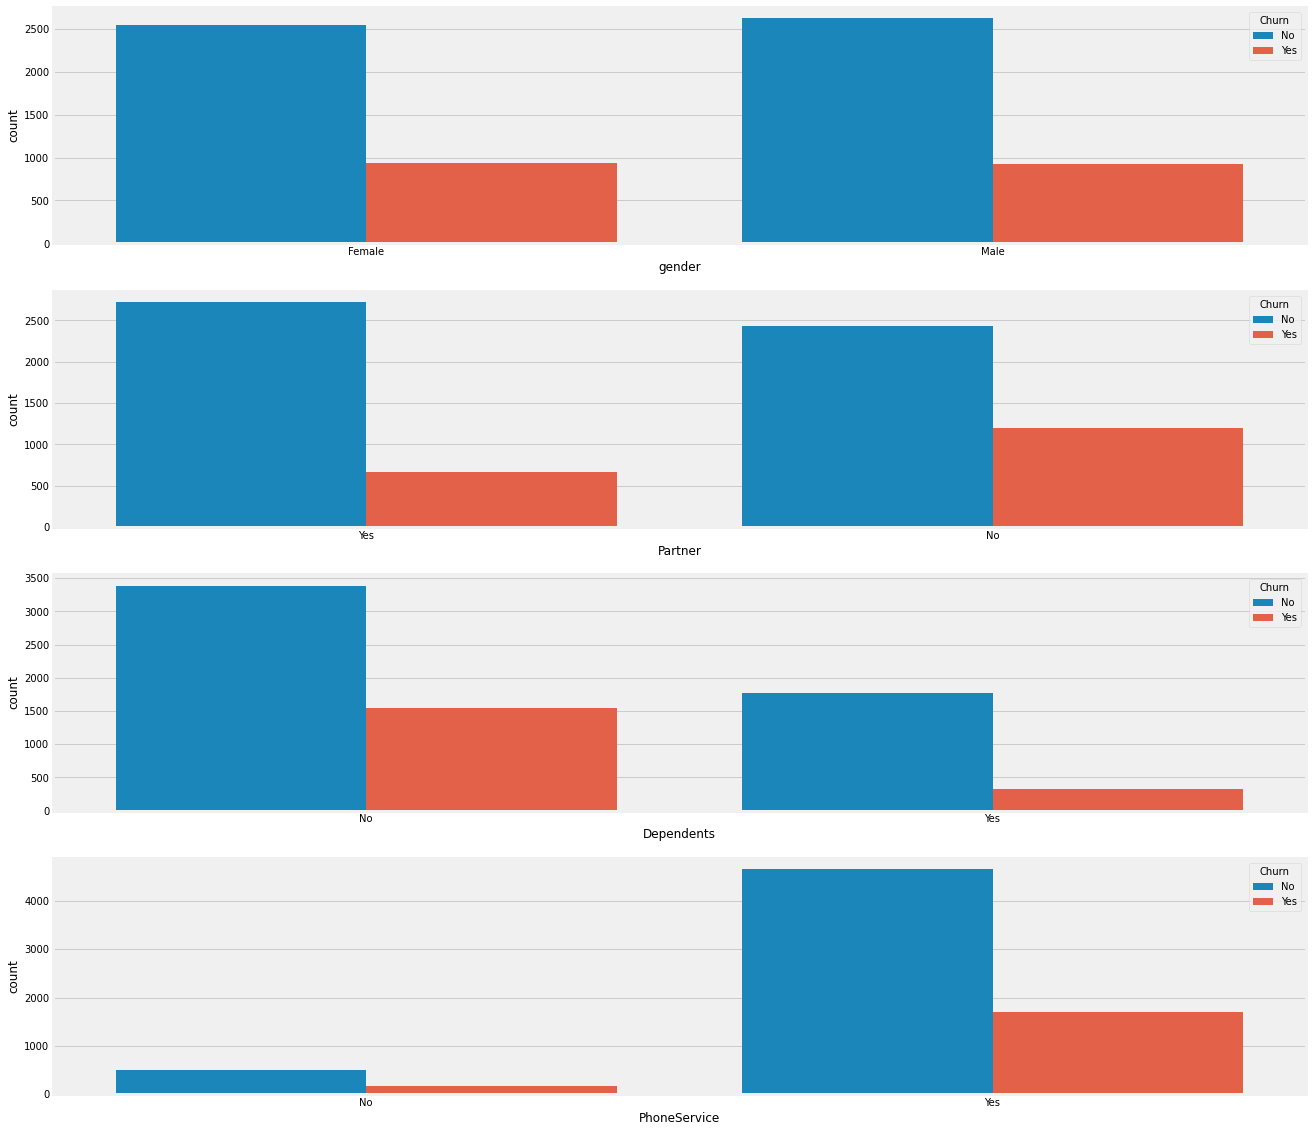

In [ ]:
plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x = 'gender', hue = 'Churn', data =data_new)
plt.subplot(412)
sns.countplot(x = 'Partner', hue = 'Churn', data = data_new)
plt.subplot(413)
sns.countplot(x = 'Dependents', hue = 'Churn', data = data_new)
plt.subplot(414)
sns.countplot(x = 'PhoneService', hue = 'Churn', data = data_new)

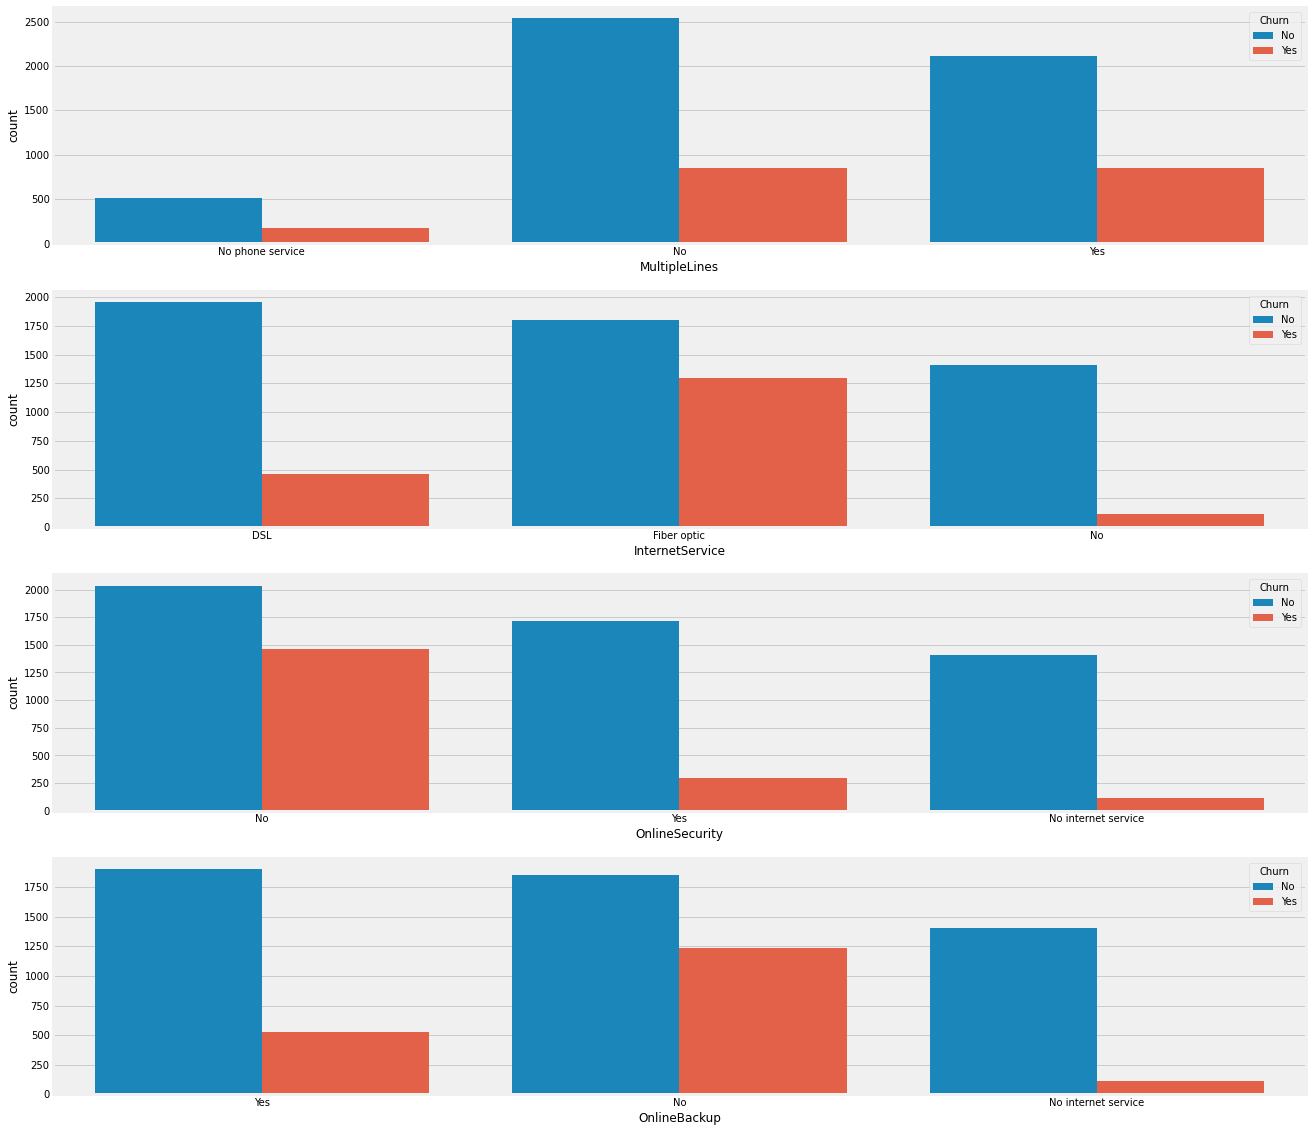

In [ ]:
plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x = 'MultipleLines', hue = 'Churn', data = data_new)
plt.subplot(412)
sns.countplot(x = 'InternetService', hue = 'Churn', data = data_new)
plt.subplot(413)
sns.countplot(x = 'OnlineSecurity', hue = 'Churn', data = data_new)
plt.subplot(414)
sns.countplot(x = 'OnlineBackup', hue = 'Churn', data = data_new)

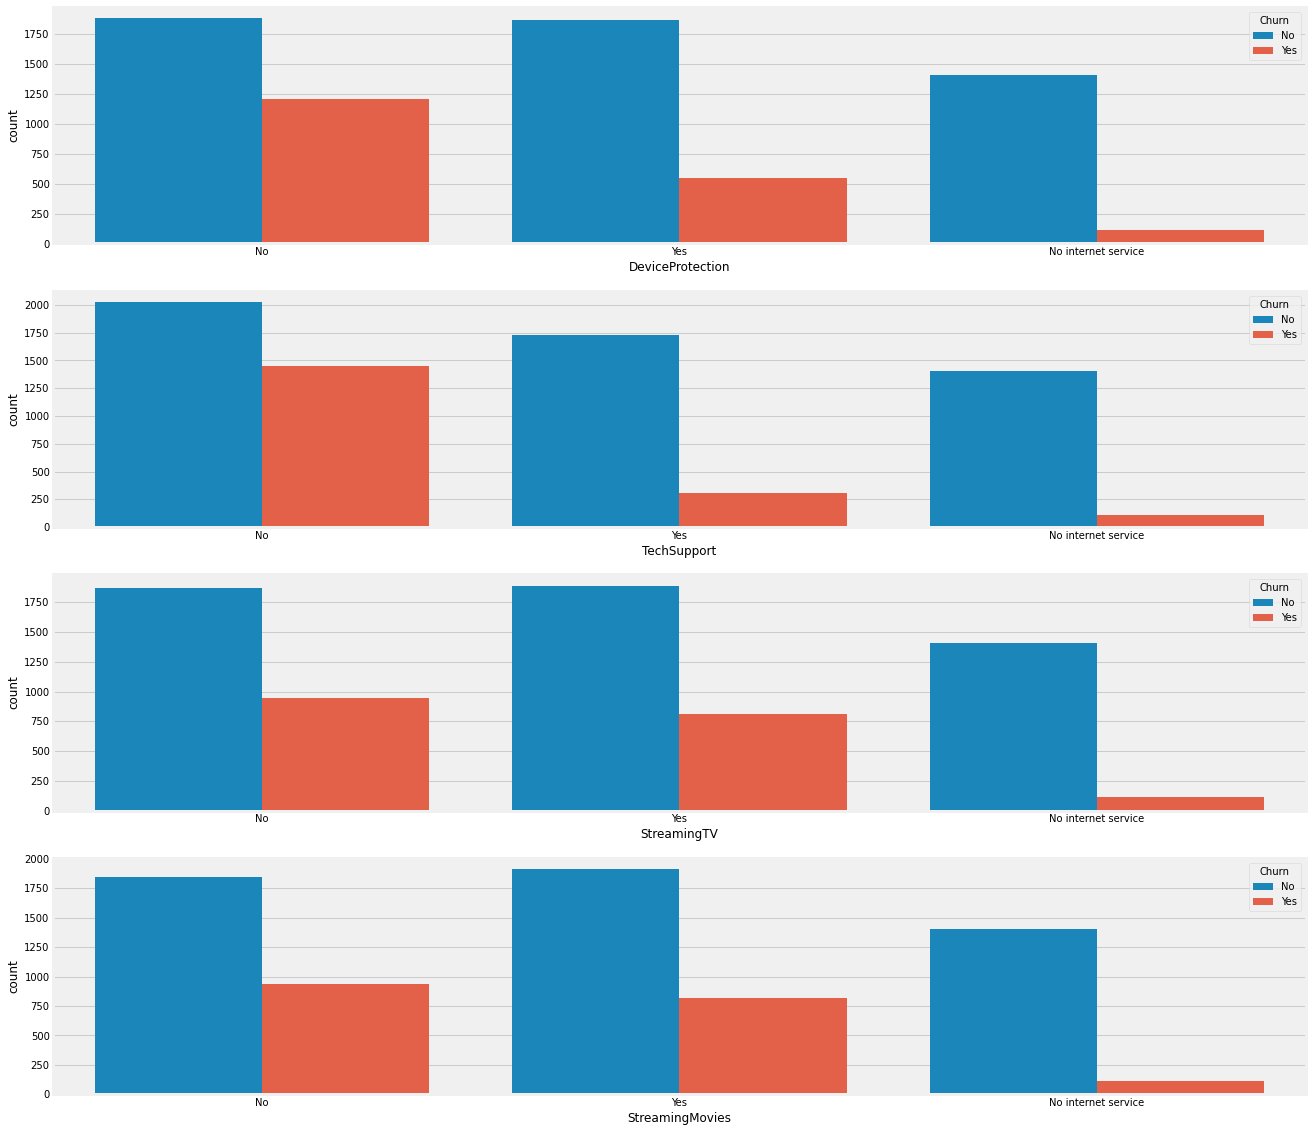

In [ ]:
plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x = 'DeviceProtection', hue = 'Churn', data = data_new)
plt.subplot(412)
sns.countplot(x = 'TechSupport', hue = 'Churn', data = data_new)
plt.subplot(413)
sns.countplot(x = 'StreamingTV', hue = 'Churn', data = data_new)
plt.subplot(414)
sns.countplot(x = 'StreamingMovies', hue = 'Churn', data =data_new)

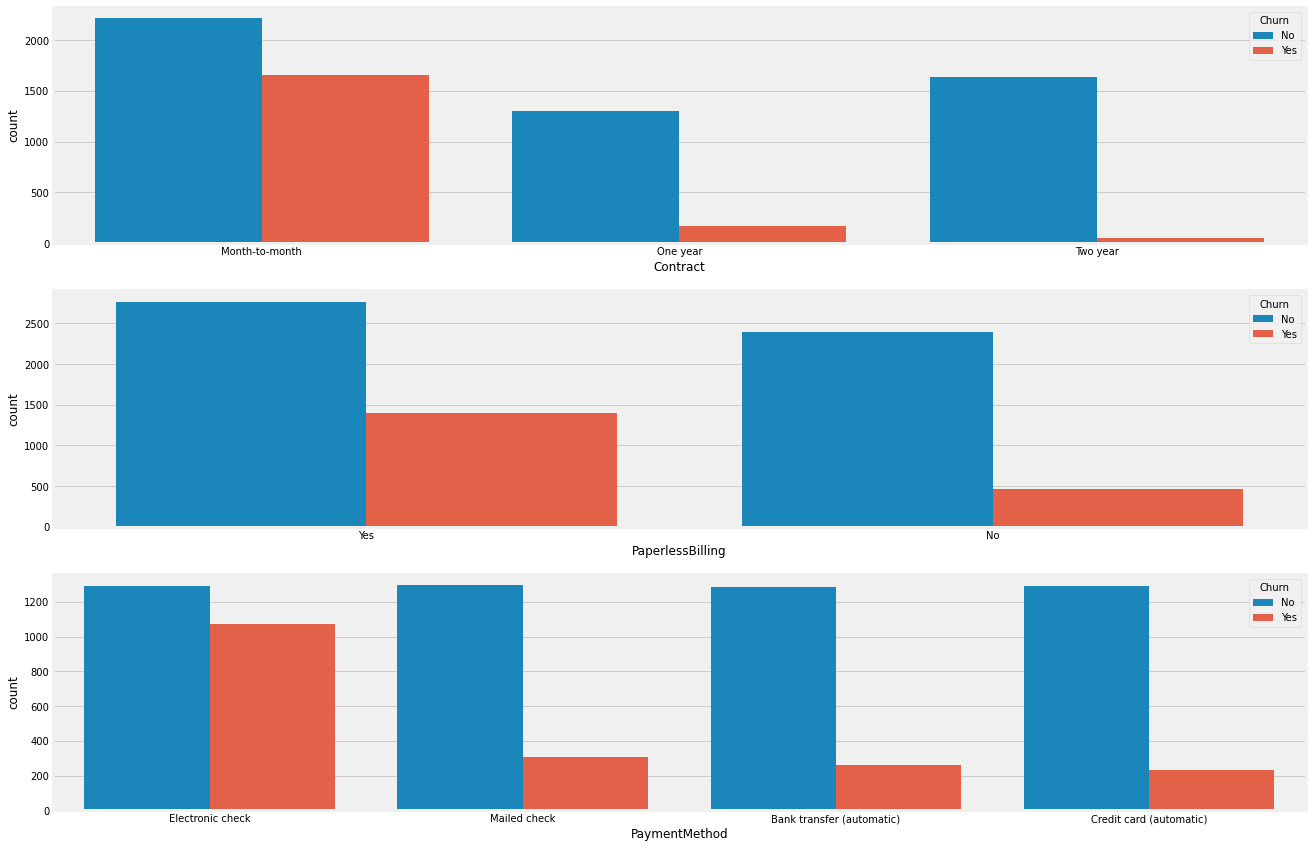

In [ ]:
plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x = 'Contract', hue = 'Churn', data = data_new)
plt.subplot(412)
sns.countplot(x = 'PaperlessBilling', hue = 'Churn', data = data_new)
plt.subplot(413)
sns.countplot(x = 'PaymentMethod', hue = 'Churn', data =data_new)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d97b11f10>,
      dtype=object)

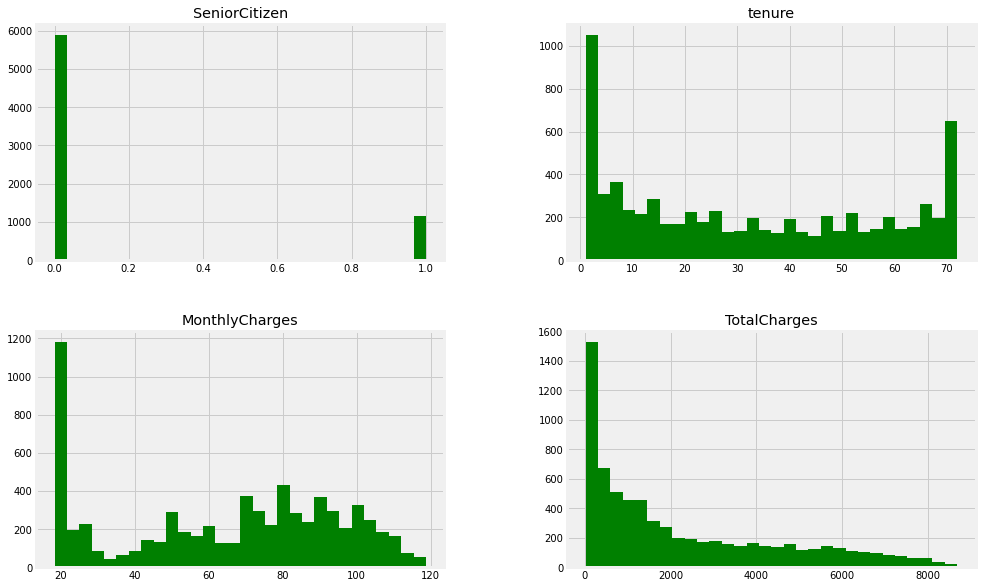

In [ ]:
#we can use hist plot to visualize numerical atttributes also
data_new.hist(bins = 30, figsize = (15,10), color = 'g')

In [ ]:
#Before proceed, let's drop 'customerID' column since it bears nothing on the data

data_new.drop(['customerID'], axis=1, inplace=True)

In [ ]:
data_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# check for categorical attributes

cat_col = []
for x in data_new.dtypes.index:
    if data_new.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [ ]:
# Print the categorical columns

for col in cat_col:
    print(col)
    print(data_new[col].value_counts())
    print()

gender
Male      3549
Female    3483
Name: gender, dtype: int64

Partner
No     3639
Yes    3393
Name: Partner, dtype: int64

Dependents
No     4933
Yes    2099
Name: Dependents, dtype: int64

PhoneService
Yes    6352
No      680
Name: PhoneService, dtype: int64

MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64

DeviceProtection
No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64

TechSupport
No                     3472
Yes                    2040
No internet service    152

In [ ]:
#Some columns have "no internet service" or "no phone service", let's replace it with just NO

data_new.replace('No internet service','No',inplace=True)
data_new.replace('No phone service','No',inplace=True)

In [ ]:
#Also let's convert the Churn column to integers

data_new['Churn'].replace({'Yes':1,'No':0},inplace=True)

In [ ]:
for col in cat_col:
    print(col)
    print(data_new[col].value_counts())
    print()

gender
Male      3549
Female    3483
Name: gender, dtype: int64

Partner
No     3639
Yes    3393
Name: Partner, dtype: int64

Dependents
No     4933
Yes    2099
Name: Dependents, dtype: int64

PhoneService
Yes    6352
No      680
Name: PhoneService, dtype: int64

MultipleLines
No     4065
Yes    2967
Name: MultipleLines, dtype: int64

InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

OnlineSecurity
No     5017
Yes    2015
Name: OnlineSecurity, dtype: int64

OnlineBackup
No     4607
Yes    2425
Name: OnlineBackup, dtype: int64

DeviceProtection
No     4614
Yes    2418
Name: DeviceProtection, dtype: int64

TechSupport
No     4992
Yes    2040
Name: TechSupport, dtype: int64

StreamingTV
No     4329
Yes    2703
Name: StreamingTV, dtype: int64

StreamingMovies
No     4301
Yes    2731
Name: StreamingMovies, dtype: int64

Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

Pa

In [ ]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [ ]:
#Label encoding

from sklearn.preprocessing import LabelEncoder
cols = ['gender','Partner','Dependents','PhoneService','MultipleLines', 'InternetService','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
le = LabelEncoder()
for col in cols:
    data_new[col] = le.fit_transform(data_new[col])


In [ ]:
data_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
data_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
#Let's scale columns with big numerical values so they don't overbear others

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_cols = ['tenure','MonthlyCharges','TotalCharges']
data_new[scaled_cols] = scaler.fit_transform(data_new[scaled_cols])

In [ ]:
for col in data_new:
    print(f'{col}: {data_new[col].unique()}')

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: [0 1 2]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtect

In [ ]:
#Input split

X = data_new.drop(columns=['Churn'], axis=1)
y = data_new['Churn']

In [ ]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

#Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

#Training the Logistic Regression Classification model on the Training set


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
#Testing the performance of model with Test Data the model has never  seen

y_pred

array([0, 0, 0, ..., 0, 0, 0])

Accuracy of 80.14789533560864 %
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1294
           1       0.66      0.52      0.58       464

    accuracy                           0.80      1758
   macro avg       0.75      0.71      0.72      1758
weighted avg       0.79      0.80      0.79      1758



col_0,0,1
Churn,,
0,1169,125
1,224,240


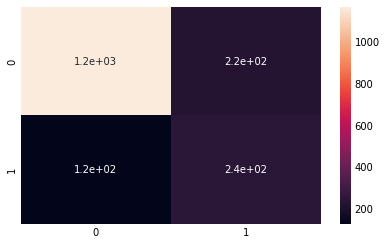

In [ ]:
#Compare what the model is predicting(y_pred) with the reality(y_test) using KPIs

from sklearn.metrics import confusion_matrix, classification_report

print("Accuracy of {} %".format( 100 * accuracy_score(y_pred, y_test)))
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred))
pd.crosstab(y_test,y_pred)

In [ ]:
#APPLYING SMOTE(Synthetic Minority Oversampling Technique) HERE TO SEE IF IT IMPROVES THE DATASET/
#COS ITSEEMS THE DATASET IS IMBALANCED

from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [ ]:
#X_train_smote, y_train_smote = smote.fit_sample(X_train.astype('float'),y_train)
X_train_smote, y_train_smote = smote.fit_sample(X_train,y_train)

In [ ]:
from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

Before SMOTE : Counter({0: 3869, 1: 1405})
After SMOTE : Counter({0: 3869, 1: 3869})


Accuracy of 75.65415244596132 %
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1294
           1       0.53      0.77      0.62       464

    accuracy                           0.76      1758
   macro avg       0.71      0.76      0.72      1758
weighted avg       0.80      0.76      0.77      1758



col_0,0,1
Churn,,
0,975,319
1,109,355


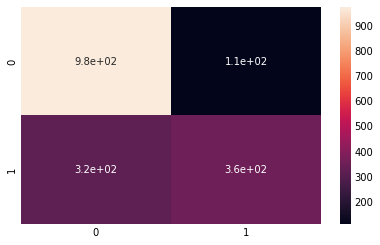

In [ ]:
model.fit(X_train_smote,y_train_smote)
y_pred = model.predict(X_test)


print("Accuracy of {} %".format( 100 * accuracy_score(y_pred, y_test)))
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred))
pd.crosstab(y_test,y_pred)

#Training the Random Forest Classification model on the Training set

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

Accuracy of 79.69283276450511 %
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1294
           1       0.66      0.47      0.55       464

    accuracy                           0.80      1758
   macro avg       0.74      0.69      0.71      1758
weighted avg       0.78      0.80      0.79      1758



col_0,0,1
Churn,,
0,1181,113
1,244,220


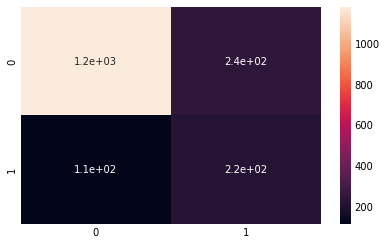

In [ ]:
#Compare what the model is predicting(y_pred) with the reality(y_test) using KPIs

from sklearn.metrics import confusion_matrix, classification_report

print("Accuracy of {} %".format( 100 * accuracy_score(y_pred, y_test)))
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred))
pd.crosstab(y_test,y_pred)

In [ ]:
X_train_smote, y_train_smote = smote.fit_sample(X_train,y_train)

In [ ]:
from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

Before SMOTE : Counter({0: 3869, 1: 1405})
After SMOTE : Counter({0: 3869, 1: 3869})


Accuracy of 78.49829351535837 %
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1294
           1       0.59      0.59      0.59       464

    accuracy                           0.78      1758
   macro avg       0.72      0.72      0.72      1758
weighted avg       0.78      0.78      0.78      1758



col_0,0,1
Churn,,
0,1106,188
1,190,274


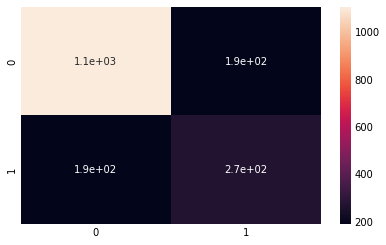

In [ ]:
model.fit(X_train_smote,y_train_smote)
y_pred = model.predict(X_test)


print("Accuracy of {} %".format( 100 * accuracy_score(y_pred, y_test)))
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred))
pd.crosstab(y_test,y_pred)

#Training the Decision Tree Classification model on the Training set

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Accuracy of 72.92377701934016 %
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1294
           1       0.49      0.49      0.49       464

    accuracy                           0.73      1758
   macro avg       0.65      0.65      0.65      1758
weighted avg       0.73      0.73      0.73      1758



col_0,0,1
Churn,,
0,1056,238
1,238,226


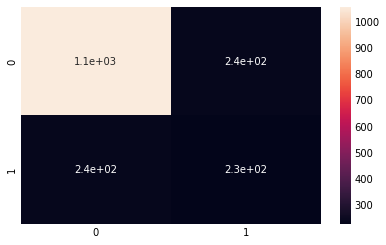

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print("Accuracy of {} %".format( 100 * accuracy_score(y_pred, y_test)))
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred))
pd.crosstab(y_test,y_pred)

In [ ]:
#X_train_smote, y_train_smote = smote.fit_sample(X_train.astype('float'),y_train)
X_train_smote, y_train_smote = smote.fit_sample(X_train,y_train)

In [ ]:
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

Before SMOTE : Counter({0: 3869, 1: 1405})
After SMOTE : Counter({0: 3869, 1: 3869})


Accuracy of 72.86689419795222 %
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      1294
           1       0.49      0.57      0.53       464

    accuracy                           0.73      1758
   macro avg       0.66      0.68      0.67      1758
weighted avg       0.74      0.73      0.74      1758



col_0,0,1
Churn,,
0,1015,279
1,198,266


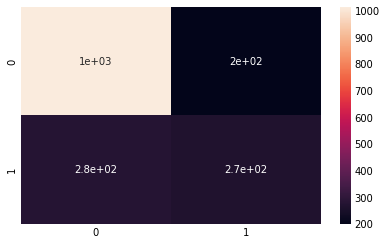

In [ ]:
model.fit(X_train_smote,y_train_smote)
y_pred = model.predict(X_test)


print("Accuracy of {} %".format( 100 * accuracy_score(y_pred, y_test)))
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred))
pd.crosstab(y_test,y_pred)

From the various models we can deduce that the f1-score for Churned(1) improved from 0.58 to 0.62 and the f1-score for Not Churned(0) reduced to 0.82 from 0.87 on the LOGISTIC REGRESSION model.

On the RANDOM FOREST classification model; the f1-score for Churned(1) improved from 0.55 to 0.59 while for Not Churned(0) it reduced to 0.85 from 0.87 

Lastly, on the DECISION TREE model;  the f1-score for Churned(1) improved from 0.49 to 0.53 while for Not Churned(0) it reduced to 0.81 from 0.82 

And we also see some balances in the prediction accuracy between both the minority(1) and the majority(0)